In [2]:
from __future__ import division
import numpy as np
import itertools
import pandas as pd
import matplotlib as mpl
import matplotlib.pyplot as plt
import seaborn as sns
from tabulate import tabulate

# Coin-Tossing Experiments: The Starting Point for Statistical Significance

## Introduction

If we have full information, we wouldn't need to rely on statistical reasoning. But we almost never (or never?) have full information. In these situations, we have to resort to thinking not just about what the world is like, but all the ways in which the world could be. 

More precisely, we'll resort to making statements such as, if x is true, then what should we expect to see? For example, if this coin is biased, how many heads should I expect to see when I toss it 10 times? Or, if I have an urn with 100,000 identically shaped tokens in it, and the tokens are either red or blue, and the proportion of blue tokens in the urn is  20%, how many blue tokens should I expect to see in a random sample of 10 tokens from the urn? 

Such thought experiments form the foundation of statistical reasoning. Being able to simulate these experiments will give us the power, control, and freedom to ask and answer questions; to gain knowledge about things we could never actually know. How this is even possible is one of the strange and magical things about statistical reasoning. Even more magical, these thought experiments will allow us to quantify how far off we are from the truth!

Let's get to it. And notice I haven't said a word about what "probability" means (yet).

## Simulating Coin Tosses

As we'll see along our journey, many things in the world can be modelled by the tossing of a coin. That's why simulating coin tosses plays a big role in reasoning about the real world when we don't have full information. 

The following function simulates the tossing of a coin. The coin can be set to any bias we choose; we can also set the number of times we want to toss the coin. If one series of coin tosses makes for one experiment, we can also set the number of experiments or trials we want.

The function registers the times when the result of the coin toss is heads -- of course we could have picked tails and nothing would change with respect to how we reason about the experiments. 

In [3]:
vals = ["H", "T"]
biasH = 0.6 # this can be set to any Real between 0 and 1
numTosses = 20
outcomes = list(np.random.choice(vals, numTosses, p=(biasH,1 - biasH)))
print outcomes
# count the number of heads
rawCount = outcomes.count("H")
normCount = rawCount/numTosses
print rawCount, normCount

['T', 'H', 'H', 'T', 'T', 'H', 'H', 'T', 'H', 'H', 'T', 'T', 'T', 'H', 'T', 'H', 'T', 'T', 'T', 'H']
9 0.45


In [4]:
a = ["h", 't', "t"]
a.count("t")

2

In [5]:
def coinToss(bias, numTosses): 
    # Convention: bias value is always the value for the first element of vals
    vals = ["H", "T"]
    outcomes = list(np.random.choice(vals, numTosses, p=(bias,1 - bias)))
    #print outcomes
    # count the number of heads
    rawCount = outcomes.count("H")
    # If user input 0 for numTosses, catch that
    try:
        normCount = rawCount/numTosses
    except ZeroDivisionError:
        normCount = 0.
    
    return rawCount, normCount

In [6]:
[coinToss(0.2,300) for i in range(5)]

[(56, 0.18666666666666668),
 (53, 0.17666666666666667),
 (63, 0.21),
 (52, 0.17333333333333334),
 (61, 0.20333333333333334)]

Let's test it out and test our intutions. We'll start by fixing the coin's bias, let's say at 0.3 for Heads and tossing the coin 3, 5, 10, 50, and 100 times.

In [7]:
b33 = coinToss(0.3, 3)
b35 = coinToss(0.3, 5)
b310 = coinToss(0.3, 10)
b350 = coinToss(0.3,50)
b3100 = coinToss(0.3, 100)
print b33, b35, b310, b350, b3100

(0, 0.0) (0, 0.0) (5, 0.5) (14, 0.28) (35, 0.35)


The first number in each of the tuples above is the number of times the coin showed H when tossed. So in the first tuple, there was 1 H in 3 tosses -- hence the second number is 0.33 which stands for the percentage of H in the total number of tosses.

For small numbers of tosses, say 3, 5, or even 10 tosses, the percentage of heads doesn't quite match up with the bias we set; however, when the number of tosses gets to high numbers like 50 and 100, the bias and the percentage start to line up.

We can explore how quickly this alignment between bias and the percentage of H in the number of tosses comes about.

In [8]:
# Toss a coin x times and count up the number of H and the percentage of H in x
b3_1_5 = [coinToss(0.3, x) for x in range(1,5)]
b3_5_10 = [coinToss(0.3, x) for x in range(5,10)]
b3_10_100 = [coinToss(0.3, x) for x in range(10,100)]
b3_100_500 = [coinToss(0.3, x) for x in range(100,500)]
b3_500_1000 = [coinToss(0.3, x) for x in range(500,1000)]
print b3_1_5

[(0, 0.0), (1, 0.5), (2, 0.6666666666666666), (2, 0.5)]


In [9]:
print range(50,100)

[50, 51, 52, 53, 54, 55, 56, 57, 58, 59, 60, 61, 62, 63, 64, 65, 66, 67, 68, 69, 70, 71, 72, 73, 74, 75, 76, 77, 78, 79, 80, 81, 82, 83, 84, 85, 86, 87, 88, 89, 90, 91, 92, 93, 94, 95, 96, 97, 98, 99]


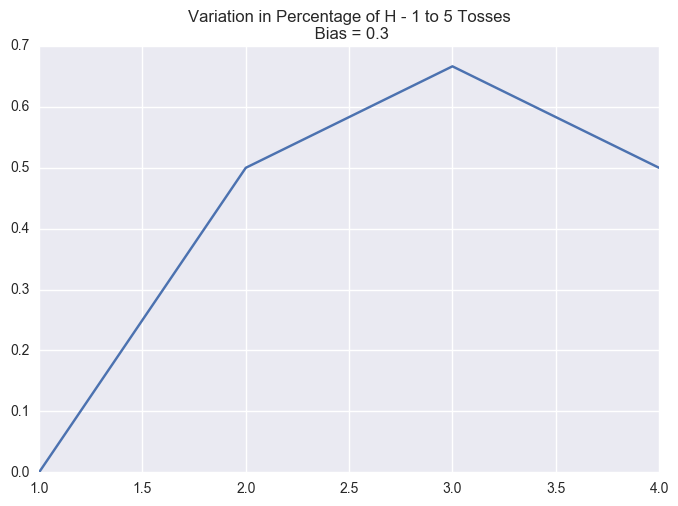

In [10]:
sns.set_style("darkgrid")
plt.plot(range(1,5), [b[1:2] for b in b3_1_5])
plt.title("Variation in Percentage of H - 1 to 5 Tosses\n Bias = 0.3")
plt.show()

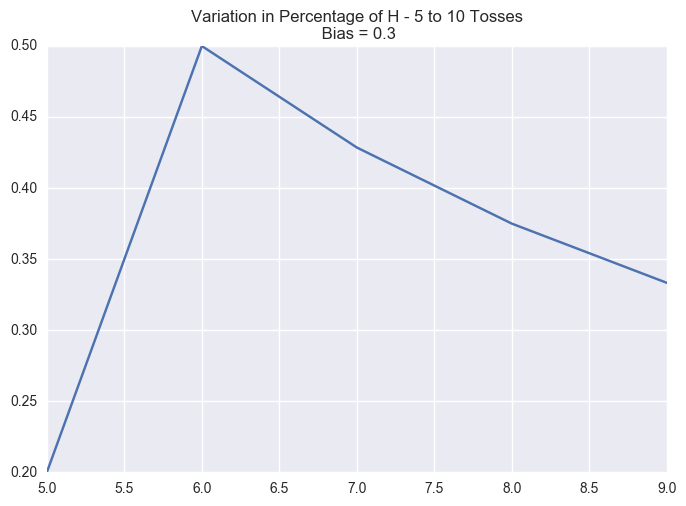

In [11]:
sns.set_style("darkgrid")
plt.plot(range(5,10), [b[1:2] for b in b3_5_10])
plt.title("Variation in Percentage of H - 5 to 10 Tosses\n Bias = 0.3")
plt.show()

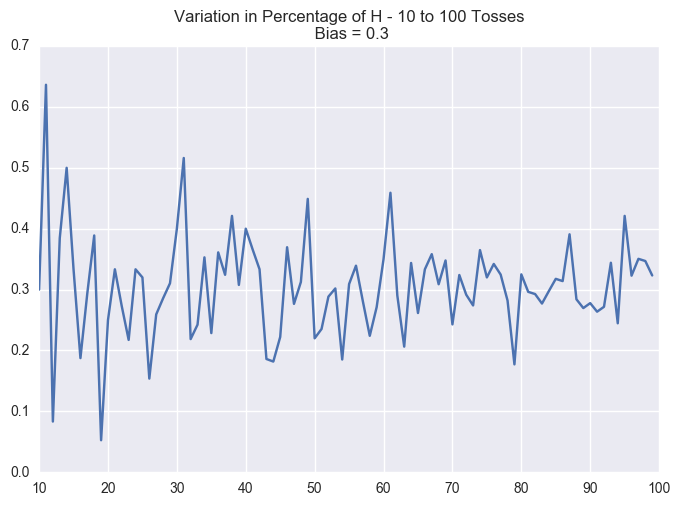

In [12]:
sns.set_style("darkgrid")
plt.plot(range(10,100), [b[1:2] for b in b3_10_100])
plt.title("Variation in Percentage of H - 10 to 100 Tosses\n Bias = 0.3")
plt.show()

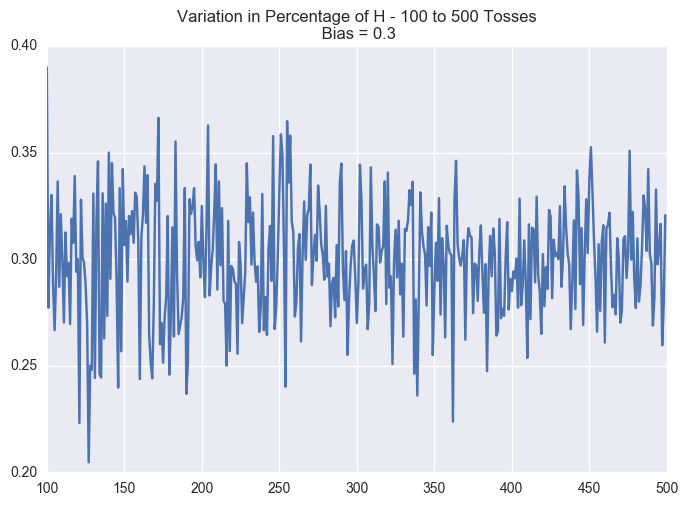

In [13]:
sns.set_style("darkgrid")
plt.plot(range(100,500), [b[1:2] for b in b3_100_500])
plt.title("Variation in Percentage of H - 100 to 500 Tosses\n Bias = 0.3")
plt.show()

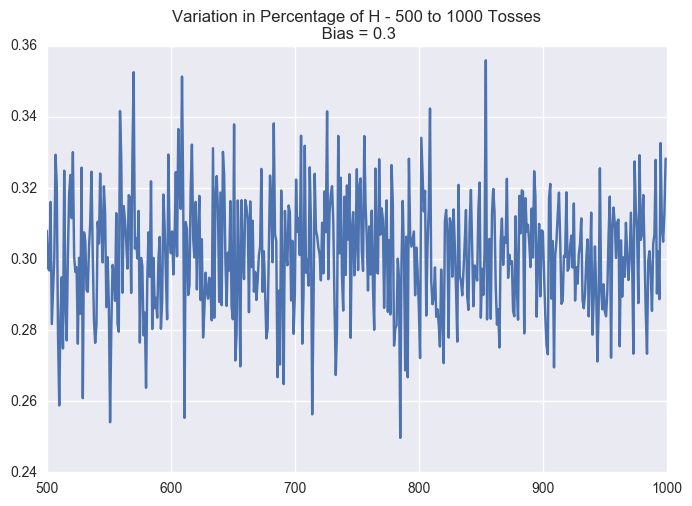

In [14]:
sns.set_style("darkgrid")
plt.plot(range(500,1000), [b[1:2] for b in b3_500_1000])
plt.title("Variation in Percentage of H - 500 to 1000 Tosses\n Bias = 0.3")
plt.show()

As the number of tosses increases, the percentage of H in each experiment jump around less and less -- roughly speaking. You can eyeball that in the charts above -- keep an eye one the y axis values whose widths grow smaller as the number of tosses is increased.

Putting it all together...

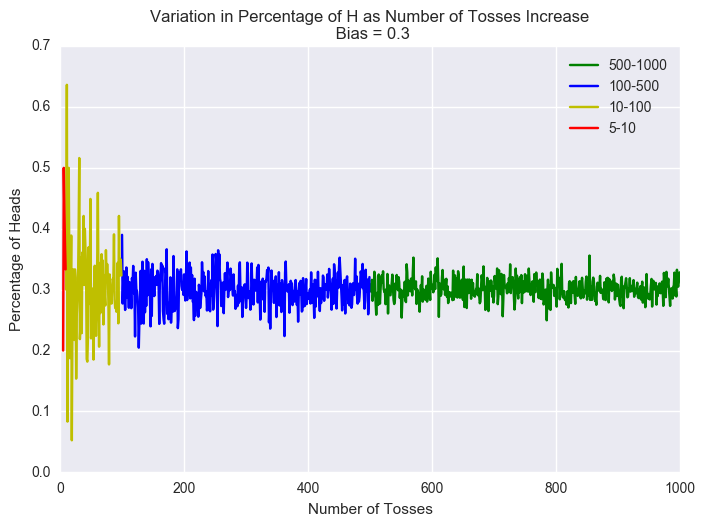

In [15]:
sns.set_style("darkgrid")
plt.plot(range(500,1000), [b[1:2] for b in b3_500_1000], "g-", label="500-1000")
plt.plot(range(100,500), [b[1:2] for b in b3_100_500], "b-", label="100-500")
plt.plot(range(10,100), [b[1:2] for b in b3_10_100], "y-", label="10-100")
plt.plot(range(5,10), [b[1:2] for b in b3_5_10], "r-", label="5-10")
plt.title("Variation in Percentage of H as Number of Tosses Increase\n Bias = 0.3")
plt.legend(loc=1)
plt.xlabel("Number of Tosses")
plt.ylabel("Percentage of Heads")
plt.show()

Now you have a feel for how coins behave, let's get to statistical inference.

# Exercises

## Exercise 1

What is $P(3 \ H \ in \ 10 \ tosses \ | \ bias = 0.3)$?

(From the P-Values and Significance Testing Notebook.)

In [16]:
# Answer to Question 1
# When we toss a coin with bias = 0.3 ten times, we get the following number of heads:
oneTrial = coinToss(0.3, 10)
print oneTrial

(4, 0.4)


However, we know that the simulation for the next set of 10 tosses can lead to a different result, namely...

In [17]:
oneTrialAgain = coinToss(0.3, 10)
print oneTrialAgain

(5, 0.5)


So the way to answer this question is to repeat the 10 tosses a large number of times, say 10,000 times, and count the number of times that we got 5 heads in the 10 tosses. If we divide this number by 10,000 it would be the probability of getting 3 heads in 10 tosses of a coin when the coin has a bias of 0.3. Let's do just that.

In [18]:
# Toss a coin 10 times; repeat 10,000 times
repeat = 10000
outcomes = [coinToss(0.3, 10) for i in range(repeat)]
# Count the number of times we get 5 heads
heads5 = [outcome[:1] for outcome in outcomes]
heads5Count = [head5[0] for head5 in heads5].count(5)
#print outcomes
#print heads5
print "Number of Events:", heads5Count, "Percentage of Total:", heads5Count/repeat

Number of Events: 1008 Percentage of Total: 0.1008


Answer: The probability of getting 5 heads in 10 tosses when the coin is biased at 0.3 towards heads is about 0.1 or 10%.

## Exercise 2

Create a function that will give the probabilty of k heads in n tosses of a coin with bias b.

In [19]:
def probCoinTossOutcome(bias, numTosses, numEvents):
    
    # numEvents is the number of times we get heads when the coin is tossed numTosses times
    
    # Generate the outcomes
    # Keep numTrials sufficiently large but not too large - it's computationally expensive
    # 10000 is a reasonable maximum but 1000 is a good practical number.
    numTrials = 1000
    outcomes = [coinToss(bias, numTosses) for i in range(numTrials)]
    
    # Count the number of times we get numEvents heads
    headsList = [outcome[:1] for outcome in outcomes]
    headsCount = [h[0] for h in headsList].count(numEvents)
    
    return [numEvents, headsCount/numTrials]

In [20]:
probCoinTossOutcome(0.3,10,5)

[5, 0.089]

In [21]:
# outcomes for a coin with bias 0.3 tossed 10 times
vals3_10 = [probCoinTossOutcome(0.3, 10, i) for i in range(11)]
print vals3_10

[[0, 0.031], [1, 0.138], [2, 0.227], [3, 0.274], [4, 0.19], [5, 0.105], [6, 0.047], [7, 0.01], [8, 0.001], [9, 0.001], [10, 0.0]]


In [22]:
# Tabulate the probCoinTossOutcome function
print tabulate(vals3_10, ["Number of Heads", "Prob of Occurrence"], tablefmt="simple")

  Number of Heads    Prob of Occurrence
-----------------  --------------------
                0                 0.031
                1                 0.138
                2                 0.227
                3                 0.274
                4                 0.19
                5                 0.105
                6                 0.047
                7                 0.01
                8                 0.001
                9                 0.001
               10                 0


## Exercise 3

Create a function that calculates the p-value of k heads in n tosses of a coin with bias b.

In [23]:
def coinTossPValue(bias, numTosses, numEvents, tailed="two-tailed"):
    
    # numEvents is the number of times we get heads when the coin is tosses numTosses times
    # tailed can be "two-tailed" (default), "left-tailed" or "right-tailed"
    
    # Find the probabilities for all the other possible outcomes
    probsAllOutcomes = [probCoinTossOutcome(bias, numTosses, i) for i in range(numTosses + 1)]
    
    # Just get the probabilities 
    probsList = [p[1:2][0] for p in probsAllOutcomes]
    
    # Probability of the required outcome -- i.e., numEvents
    probRequired = probsList[numEvents]
    
    # Identify and sum all the probabilities in probsList that are less than or equal to probRequired
    # including probRequired.
    # By default this is for a two-tailed sum.
    pList = []
    for p in probsList:
        if p <= probRequired:
            pList.append(p)
    
    # Left tail list of probabilities
    pListLeftTailed = []
    for index, prob in enumerate(probsList):
        if (prob <= probRequired) and (index <= numEvents):
            pListLeftTailed.append(prob)
            
    # Right tail list of probabilities
    pListRightTailed = []
    for index, prob in enumerate(probsList):
        if (prob <= probRequired) and (index >= numEvents):
            pListRightTailed.append(prob)
    
    # The two-tailed p-value is the sum of all the probabilities in pList
    pValue = sum(pList)
    
    # Left tailed p-value is the sum of all the probabilities in the pListLeftTailed
    pValueLeftTailed = sum(pListLeftTailed)
    
    # Right tailed p-value is the sum of all the probabilities in the pListRightTailed
    pValueRightTailed = sum(pListRightTailed)
    
    # Set the p-value displayed based on the input value of the tailed variable
    if tailed == "two-tailed":
        pValueDisplay = pValue
    elif tailed == "left-tailed":
        pValueDisplay = pValueLeftTailed
    elif tailed == "right-tailed":
        pValueDisplay = pValueRightTailed
    else:
        pValueDisplay = pValue
    
    #return probsList, probRequired, pList, pValue
    return [bias, numTosses, numEvents, pValueDisplay]

In [24]:
[coinTossPValue(0.3, x, y, z) for [x,y,z] in [[10,5,"two-tailed"], [10,5,"left-tailed"], [10,5,"right-tailed"]]]

[[0.3, 10, 5, 0.17800000000000002], [0.3, 10, 5, 0.133], [0.3, 10, 5, 0.17]]

## Exercise 4

Use the function coinTossPValue to generate the p-value for every possible outcome for the number of heads that appear when a coin is tossed 10 times (for a given hypothesis about the bias of the coin).

In [25]:
# Assume the bias = 0.3
# Calculate the p-value for every possible outcome 
# for number of heads in a coin tossed 10 times
print tabulate([coinTossPValue(0.3, 10, i, 0, "two-tailed") for i in range(11)], 
               ["Bias Hypothesis", "Number of Tosses","Number of Heads", "P-Value"], 
               tablefmt="simple")

  Bias Hypothesis    Number of Tosses    Number of Heads    P-Value
-----------------  ------------------  -----------------  ---------
              0.3                  10                  0      0.033
              0.3                  10                  1      0.317
              0.3                  10                  2      0.756
              0.3                  10                  3      0.99
              0.3                  10                  4      0.513
              0.3                  10                  5      0.314
              0.3                  10                  6      0.066
              0.3                  10                  7      0.017
              0.3                  10                  8      0
              0.3                  10                  9      0.002
              0.3                  10                 10      0


## Exercise 5

Use the function coinTossPValue to generate the p-value of obtaining 5 heads in 10 tosses for all possible biases of the coin (we'll restrict the possible bias values to the discrete set of values 0, 0.1, 0.2, ..., 0.9, 1).

In [26]:
pValuesByBias = [coinTossPValue(i, 10, 5) for i in np.arange(0, 1.1, 0.1)]
# pValuesByBias displays the [number of heads obtained, the p-value for this result]
# out = zip(np.arange(0, 1.1, 0.1), pValuesByBias)
# out = [bias value, number of heads obtained, p-value for this result]
print pValuesByBias

[[0.0, 10, 5, 0.0], [0.10000000000000001, 10, 5, 0.001], [0.20000000000000001, 10, 5, 0.037000000000000005], [0.30000000000000004, 10, 5, 0.168], [0.40000000000000002, 10, 5, 0.526], [0.5, 10, 5, 1.028], [0.60000000000000009, 10, 5, 0.543], [0.70000000000000007, 10, 5, 0.159], [0.80000000000000004, 10, 5, 0.04], [0.90000000000000002, 10, 5, 0.003], [1.0, 10, 5, 0.0]]


In [27]:
print tabulate(pValuesByBias, ["Bias", "Number of Tosses",  "Number of Heads", "P-Value"], tablefmt="simple")

  Bias    Number of Tosses    Number of Heads    P-Value
------  ------------------  -----------------  ---------
   0                    10                  5      0
   0.1                  10                  5      0.001
   0.2                  10                  5      0.037
   0.3                  10                  5      0.168
   0.4                  10                  5      0.526
   0.5                  10                  5      1.028
   0.6                  10                  5      0.543
   0.7                  10                  5      0.159
   0.8                  10                  5      0.04
   0.9                  10                  5      0.003
   1                    10                  5      0


## Exercise 6

Show how the p-values of the outcomes of an experiment vary as the experiment produces more and more data.

To keep this computationally lean, let's show how the p-values evolve as the experiment gathers more and more data. We'll see how our 95% confidence intervals change as more data is gathered or, what amounts to the same thing, the sample size increases.

In [28]:
# Set up the evolution of increase in sample size
experiments = [[10,5], [20,10], [30,15], [40,20], [50,25], [100,50]]
pValues_point_1 = [coinTossPValue(0.1, x, y) for [x,y] in experiments]
pValues_point_2 = [coinTossPValue(0.2, x, y) for [x,y] in experiments]
pValues_point_3 = [coinTossPValue(0.3, x, y) for [x,y] in experiments]
pValues_point_4 = [coinTossPValue(0.4, x, y) for [x,y] in experiments]
pValues_point_5 = [coinTossPValue(0.5, x, y) for [x,y] in experiments]
pValues_point_6 = [coinTossPValue(0.6, x, y) for [x,y] in experiments]
pValues_point_7 = [coinTossPValue(0.7, x, y) for [x,y] in experiments]
pValues_point_8 = [coinTossPValue(0.8, x, y) for [x,y] in experiments]
pValues_point_9 = [coinTossPValue(0.9, x, y) for [x,y] in experiments]
outConfInts = [pValues_point_1, pValues_point_2, pValues_point_3,
       pValues_point_4, pValues_point_5, pValues_point_6, 
       pValues_point_7, pValues_point_8, pValues_point_9]

print outConfInts

[[[0.1, 10, 5, 0.0], [0.1, 20, 10, 0.0], [0.1, 30, 15, 0.0], [0.1, 40, 20, 0.0], [0.1, 50, 25, 0.0], [0.1, 100, 50, 0.0]], [[0.2, 10, 5, 0.032], [0.2, 20, 10, 0.005], [0.2, 30, 15, 0.0], [0.2, 40, 20, 0.0], [0.2, 50, 25, 0.0], [0.2, 100, 50, 0.0]], [[0.3, 10, 5, 0.297], [0.3, 20, 10, 0.10400000000000001], [0.3, 30, 15, 0.019000000000000003], [0.3, 40, 20, 0.004], [0.3, 50, 25, 0.0], [0.3, 100, 50, 0.0]], [[0.4, 10, 5, 0.754], [0.4, 20, 10, 0.35000000000000003], [0.4, 30, 15, 0.29200000000000004], [0.4, 40, 20, 0.22700000000000004], [0.4, 50, 25, 0.14900000000000002], [0.4, 100, 50, 0.084]], [[0.5, 10, 5, 1.033], [0.5, 20, 10, 1.0279999999999998], [0.5, 30, 15, 0.869], [0.5, 40, 20, 0.7130000000000001], [0.5, 50, 25, 1.0229999999999997], [0.5, 100, 50, 0.9110000000000001]], [[0.6, 10, 5, 0.53], [0.6, 20, 10, 0.478], [0.6, 30, 15, 0.27999999999999997], [0.6, 40, 20, 0.24100000000000002], [0.6, 50, 25, 0.24500000000000002], [0.6, 100, 50, 0.036000000000000004]], [[0.7, 10, 5, 0.1899999999

In [29]:
for i in range(9):
    print tabulate(outConfInts[i], ["Bias", "Num Tosses", "Num Heads", "P-Value"], tablefmt="simple")

  Bias    Num Tosses    Num Heads    P-Value
------  ------------  -----------  ---------
   0.1            10            5          0
   0.1            20           10          0
   0.1            30           15          0
   0.1            40           20          0
   0.1            50           25          0
   0.1           100           50          0
  Bias    Num Tosses    Num Heads    P-Value
------  ------------  -----------  ---------
   0.2            10            5      0.032
   0.2            20           10      0.005
   0.2            30           15      0
   0.2            40           20      0
   0.2            50           25      0
   0.2           100           50      0
  Bias    Num Tosses    Num Heads    P-Value
------  ------------  -----------  ---------
   0.3            10            5      0.297
   0.3            20           10      0.104
   0.3            30           15      0.019
   0.3            40           20      0.004
   0.3            50      

In [30]:
# for each outConfInt and for each number of tosses, identify the biases that cannot be "rejected"
# at the 0.05 significance level. This is a way to simplify the display in the table above.
# Initialize the arrays
notRejected10 = []
notRejected20 = []
notRejected30 = []
notRejected40 = []
notRejected50 = []
notRejected100 = []
rejected = []

sigLevel = 0.05

for outs in outConfInts:
    for out in outs:
        if (out[1] == 10) and (out[3] > sigLevel):
            notRejected10.append(out)
        elif (out[1] == 20) and (out[3] > sigLevel):
            notRejected20.append(out)
        elif (out[1] == 30) and (out[3] > sigLevel):
            notRejected30.append(out)
        elif (out[1] == 40) and (out[3] > sigLevel):
            notRejected40.append(out)
        elif (out[1] == 50) and (out[3] > sigLevel):
            notRejected50.append(out)
        elif (out[1] == 100) and (out[3] > sigLevel):
            notRejected100.append(out)
        else:
            rejected.append(out)

notRejectedArray = [notRejected10, notRejected20, notRejected30, notRejected40, notRejected50, notRejected100]
print notRejectedArray, rejected

[[[0.3, 10, 5, 0.297], [0.4, 10, 5, 0.754], [0.5, 10, 5, 1.033], [0.6, 10, 5, 0.53], [0.7, 10, 5, 0.18999999999999997]], [[0.3, 20, 10, 0.10400000000000001], [0.4, 20, 10, 0.35000000000000003], [0.5, 20, 10, 1.0279999999999998], [0.6, 20, 10, 0.478], [0.7, 20, 10, 0.067]], [[0.4, 30, 15, 0.29200000000000004], [0.5, 30, 15, 0.869], [0.6, 30, 15, 0.27999999999999997]], [[0.4, 40, 20, 0.22700000000000004], [0.5, 40, 20, 0.7130000000000001], [0.6, 40, 20, 0.24100000000000002]], [[0.4, 50, 25, 0.14900000000000002], [0.5, 50, 25, 1.0229999999999997], [0.6, 50, 25, 0.24500000000000002]], [[0.4, 100, 50, 0.084], [0.5, 100, 50, 0.9110000000000001]]] [[0.1, 10, 5, 0.0], [0.1, 20, 10, 0.0], [0.1, 30, 15, 0.0], [0.1, 40, 20, 0.0], [0.1, 50, 25, 0.0], [0.1, 100, 50, 0.0], [0.2, 10, 5, 0.032], [0.2, 20, 10, 0.005], [0.2, 30, 15, 0.0], [0.2, 40, 20, 0.0], [0.2, 50, 25, 0.0], [0.2, 100, 50, 0.0], [0.3, 30, 15, 0.019000000000000003], [0.3, 40, 20, 0.004], [0.3, 50, 25, 0.0], [0.3, 100, 50, 0.0], [0.6, 

In [31]:
print tabulate(notRejected30)

---  --  --  -----
0.4  30  15  0.292
0.5  30  15  0.869
0.6  30  15  0.28
---  --  --  -----


In [32]:
# For different number of tosses (sample sizes), the biases that are not rejected
# Notice that as the sample sizes increase, the range of bias values decreases
for i in range(6):
    print tabulate(notRejectedArray[i], ["Bias", "Num Tosses", "Num Heads", "P-Value"], tablefmt="simple")

  Bias    Num Tosses    Num Heads    P-Value
------  ------------  -----------  ---------
   0.3            10            5      0.297
   0.4            10            5      0.754
   0.5            10            5      1.033
   0.6            10            5      0.53
   0.7            10            5      0.19
  Bias    Num Tosses    Num Heads    P-Value
------  ------------  -----------  ---------
   0.3            20           10      0.104
   0.4            20           10      0.35
   0.5            20           10      1.028
   0.6            20           10      0.478
   0.7            20           10      0.067
  Bias    Num Tosses    Num Heads    P-Value
------  ------------  -----------  ---------
   0.4            30           15      0.292
   0.5            30           15      0.869
   0.6            30           15      0.28
  Bias    Num Tosses    Num Heads    P-Value
------  ------------  -----------  ---------
   0.4            40           20      0.227
   0.5        

For a given bit of evidence and a threshold level (alpha), which bias values are accepted and which bias values are rejected?

See the *SharedFunctions* notebook.